<a href="https://colab.research.google.com/github/Swami-Siva-Rama-Raju/ML-Algorithms-Projects/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.preprocessing import MinMaxScaler

**Loading Dataset**

In [2]:
credit_df=pd.read_csv('/content/drive/MyDrive/creditcard.csv')

**understanding Dataset**

In [3]:
credit_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
credit_df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [5]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
credit_df.shape

(284807, 31)

In [7]:
credit_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


**Data Preprocessing & Cleaning**

In [8]:
credit_df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [9]:
credit_df.duplicated().sum()

1081

In [10]:
credit_df.drop_duplicates(inplace=True)

In [11]:
credit_df.duplicated().sum()

0

In [12]:
credit_df.shape

(283726, 31)

**EDA**

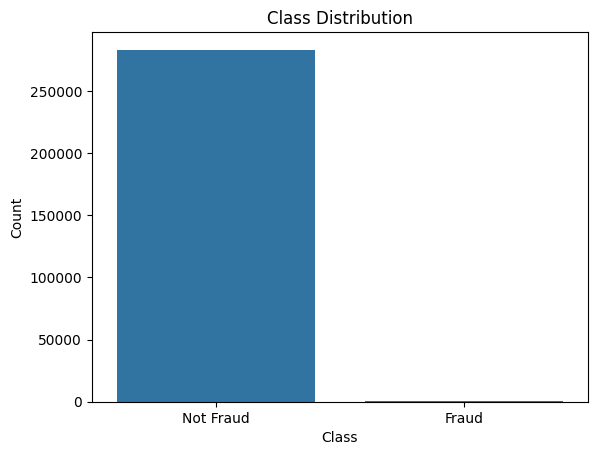

In [13]:
sns.countplot(x='Class', data=credit_df)
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Fraud', 'Fraud'])
plt.title('Class Distribution')
plt.show()

*You can see that the dataset is clearly unbalanced*

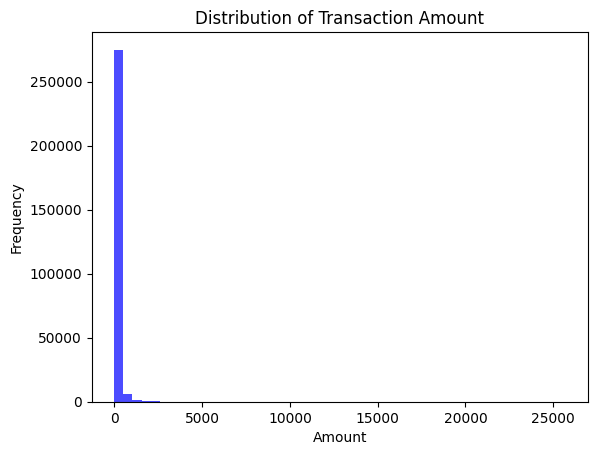

In [14]:
plt.hist(credit_df['Amount'], bins=50, color='blue', alpha=0.7)
plt.title('Distribution of Transaction Amount')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

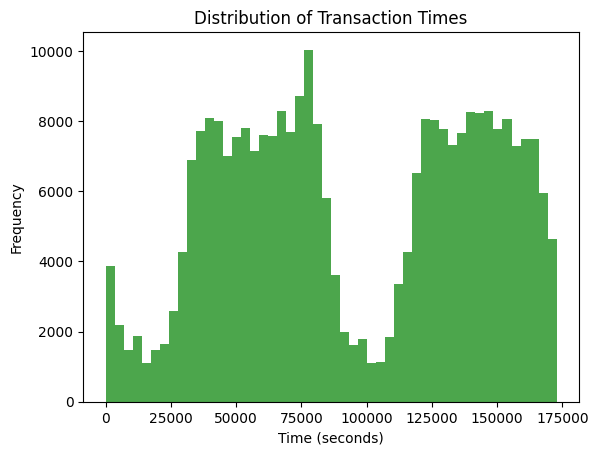

In [15]:
plt.hist(credit_df['Time'], bins=50, color='green', alpha=0.7)
plt.title('Distribution of Transaction Times')
plt.xlabel('Time (seconds)')
plt.ylabel('Frequency')
plt.show()


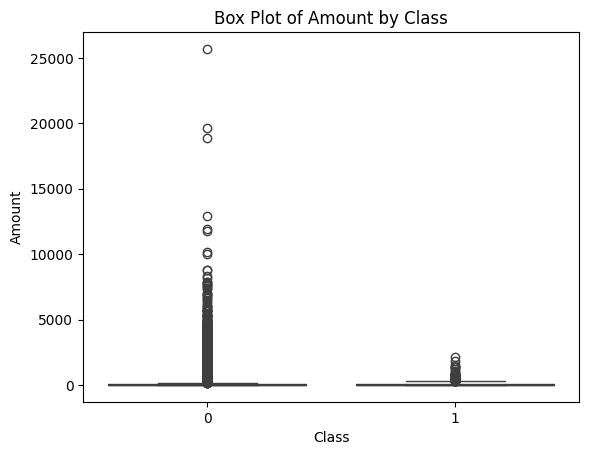

In [16]:
sns.boxplot(x='Class', y='Amount', data=credit_df)
plt.title('Box Plot of Amount by Class')
plt.show()


In [17]:
#seperate fraud and not fraud
fraud=credit_df[credit_df['Class']==1]
not_fraud=credit_df[credit_df['Class']==0]

In [18]:
fraud.shape

(473, 31)

In [19]:
fraud.Amount.describe()

,Amount
count,473.000000
mean,123.871860
std,260.211041
min,0.000000
25%,1.000000
50%,9.820000
75%,105.890000
max,2125.870000


In [20]:
fraud.Time.describe()

,Time
count,473.000000
mean,80450.513742
std,48636.179973
min,406.000000
25%,41203.000000
50%,73408.000000
75%,129095.000000
max,170348.000000


In [21]:
not_fraud.shape

(283253, 31)

In [22]:
not_fraud.Amount.describe()

,Amount
count,283253.000000
mean,88.413575
std,250.379023
min,0.000000
25%,5.670000
50%,22.000000
75%,77.460000
max,25691.160000


In [23]:
not_fraud.Time.describe()

,Time
count,283253.000000
mean,94835.058093
std,47475.550607
min,0.000000
25%,54233.000000
50%,84711.000000
75%,139308.000000
max,172792.000000


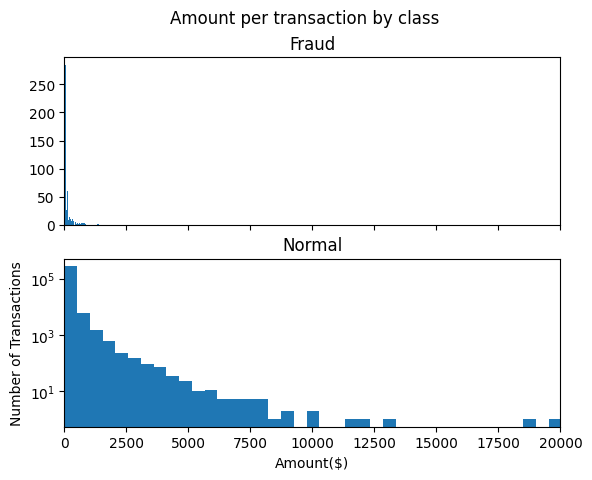

In [24]:
f, (ax1, ax2)=plt.subplots (2, 1, sharex=True)#creates a figure with two subplots in 2 rows and 1 column and they share x axis
f.suptitle("Amount per transaction by class") #it creates a title for the figure
bins=50 #Number of Intervals
ax1.hist(fraud.Amount, bins=bins)
ax1.set_title('Fraud') #sets title for first subplot ax1
ax2.hist(not_fraud.Amount, bins = bins)
ax2.set_title('Normal') #sets title for 2nd subplot ax2
plt.xlabel("Amount($)") #same x-axis for both subplots
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))#sets the limit of the x-axis to range from 0 to 20,000
plt.yscale('log')# sets the scale of the y-axis to logarithmic,useful for visualizing data with a wide range of values.
plt.show();

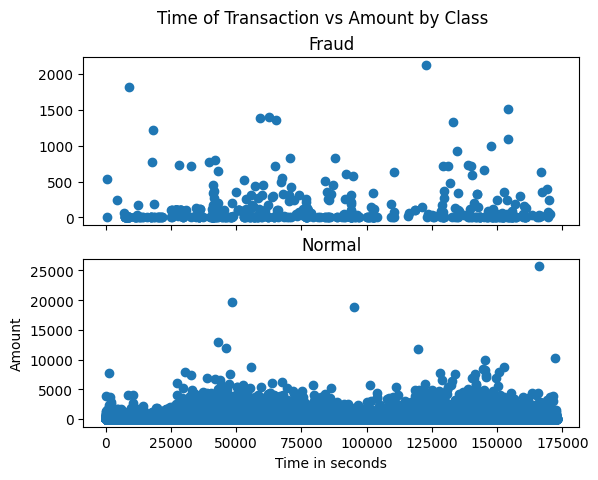

In [25]:
f, (ax1, ax2)=plt.subplots (2, 1, sharex=True)
f.suptitle("Time of Transaction vs Amount by Class")
ax1.scatter(fraud.Time, fraud.Amount)
ax1.set_title('Fraud')
ax2.scatter(not_fraud.Time, not_fraud.Amount)
ax2.set_title('Normal')
plt.xlabel("Time in seconds")
plt.ylabel("Amount")
plt.show();

**Model Builiding**

*Becuase of the large Dataset first we build our model with sample dataset and later we will do it with entire dataset*

In [26]:
#take a sample data
sample_df=credit_df.sample(frac=0.1, random_state=1)

In [27]:
#fraud and not_fraud in sample data
fraud=sample_df[sample_df['Class']==1]
not_fraud=sample_df[sample_df['Class']==0]

In [28]:
len(fraud)

40

In [29]:
len(not_fraud)

28333

In [30]:
#Seperating independent and dependent features
X=sample_df.drop('Class', axis=1)
Y=sample_df['Class']

In [31]:
#Train Test Split
X_train, X_test, Y_train, Y_test=train_test_split(X, Y, test_size=0.2, random_state=2)
print(X.shape, X_train.shape, X_test.shape)
print(Y.shape, Y_train.shape, Y_test.shape)

(28373, 30) (22698, 30) (5675, 30)
(28373,) (22698,) (5675,)


In [32]:
#Fitting data to model
model_gnb=GaussianNB()
model_gnb.fit(X_train, Y_train)
#predict
y_pred=model_gnb.predict(X_test)
#Accuracy of sample data using GNB
gnb=accuracy_score(Y_test, y_pred)
#classification report
gnb_cr=classification_report(Y_test, y_pred)

In [33]:
#Fitting data to model
model_bnb=BernoulliNB()
model_bnb.fit(X_train, Y_train)
#predict
y_pred=model_bnb.predict(X_test)
#Accuracy of sample data using BNB
bnb=accuracy_score(Y_test, y_pred)
#classification report
bnb_cr=classification_report(Y_test, y_pred)

In [34]:
normalizer=MinMaxScaler()
X_norm=normalizer.fit_transform(X)
Y_norm=normalizer.fit_transform(Y.values.reshape(len(Y), 1))

In [35]:
#Fitting data to model
model_mnb=MultinomialNB()
model_mnb.fit(X_norm, Y_norm)
#predict
y_pred=model_mnb.predict(X_test)
#Accuracy of sample data using MNB
mnb=accuracy_score(Y_test, y_pred)
#classification report
mnb_cr=classification_report(Y_test, y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but MultinomialNB was fitted without feature names
  warnings.warn(


In [36]:
#Printing classification report of model on sample data using three types of NB
print("Classification report of sample data using GNB: \n", gnb_cr)
print("Classification report of sample data using BNB: \n", bnb_cr)
print("Classification report of sample data using MNB: \n", mnb_cr)

Classification report of sample data using GNB: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5667
           1       0.24      1.00      0.39         8

    accuracy                           1.00      5675
   macro avg       0.62      1.00      0.69      5675
weighted avg       1.00      1.00      1.00      5675

Classification report of sample data using BNB: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5667
           1       0.67      0.75      0.71         8

    accuracy                           1.00      5675
   macro avg       0.83      0.87      0.85      5675
weighted avg       1.00      1.00      1.00      5675

Classification report of sample data using MNB: 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99      5667
           1       0.00      0.00      0.00         8

    accuracy                    

In [37]:
#Printing Accuracy of model on sample data using three types of NB
print("Accuracy of sample data using GNB: ", gnb)
print("Accuracy of sample data using BNB: ", bnb)
print("Accuracy of sample data using MNB: ", mnb)

Accuracy of sample data using GNB:  0.9955947136563876
Accuracy of sample data using BNB:  0.9991189427312775
Accuracy of sample data using MNB:  0.9777973568281938


*Now let's train our model with entire data*

In [38]:
X=credit_df.drop('Class', axis=1)
Y=credit_df['Class']

In [39]:
X_train, X_test, Y_train, Y_test=train_test_split(X, Y, test_size=0.2, random_state=2)
print(X.shape, X_train.shape, X_test.shape)
print(Y.shape, Y_train.shape, Y_test.shape)

(283726, 30) (226980, 30) (56746, 30)
(283726,) (226980,) (56746,)


In [40]:
X_norm=normalizer.fit_transform(X)
Y_norm=normalizer.fit_transform(Y.values.reshape(len(Y), 1))

In [41]:
#Fit the data
model_mnb=MultinomialNB()
model_mnb.fit(X_norm, Y_norm)
#predict
y_pred=model_mnb.predict(X_test)
#Accuracy of model on entire data using MNB
mnb=accuracy_score(Y_test, y_pred)
#classification report
mnb_cr=classification_report(Y_test, y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but MultinomialNB was fitted without feature names
  warnings.warn(


In [42]:
#fit the data
model_gnb=GaussianNB()
model_gnb.fit(X_train, Y_train)
#Predict
y_pred=model_gnb.predict(X_test)
#Accuracy of model on entire data using GNB
gnb=accuracy_score(Y_test, y_pred)
#classification report
gnb_cr=classification_report(Y_test, y_pred)

In [43]:
#Fit the data
model_bnb=BernoulliNB()
model_bnb.fit(X_train, Y_train)
#predict
y_pred=model_bnb.predict(X_test)
#Accuracy of model on entire data using BNB
bnb=accuracy_score(Y_test, y_pred)
#classification report
bnb_cr=classification_report(Y_test, y_pred)

In [44]:
#Printing classification report of model on entire data using three types of NB
print("Classification report of sample data using GNB: \n", gnb_cr)
print("Classification report of sample data using BNB: \n", bnb_cr)
print("Classification report of sample data using MNB: \n", mnb_cr)

Classification report of sample data using GNB: 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     56661
           1       0.13      0.61      0.22        85

    accuracy                           0.99     56746
   macro avg       0.57      0.80      0.61     56746
weighted avg       1.00      0.99      1.00     56746

Classification report of sample data using BNB: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56661
           1       0.79      0.64      0.71        85

    accuracy                           1.00     56746
   macro avg       0.90      0.82      0.85     56746
weighted avg       1.00      1.00      1.00     56746

Classification report of sample data using MNB: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56661
           1       0.01      0.01      0.01        85

    accuracy                    

In [45]:
#printing accuracy of model on entire data using MNB,GNB,BNB
print("Accuracy of entire data using GNB: ", gnb)
print("Accuracy of entire data using BNB: ", bnb)
print("Accuracy of entire data using MNB: ", mnb)

Accuracy of entire data using GNB:  0.9933739823071229
Accuracy of entire data using BNB:  0.9992069925633524
Accuracy of entire data using MNB:  0.9966693687660805
